<a href="https://colab.research.google.com/github/suryansh2207/Sentiment-Classification-Using-LSTM-Networks/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow pandas nltk matplotlib seaborn


In [2]:
import pandas as pd

# Load the IMDb dataset from Keras
from tensorflow.keras.datasets import imdb

# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 0s 0us/step


In [3]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure uniform input length
max_length = 200
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Check the shape of the data
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


Training data shape: (25000, 200)
Testing data shape: (25000, 200)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    LSTM(units=128, return_sequences=True),
    Dropout(0.2),
    LSTM(units=128),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 200, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1543297 (5.89 MB)
Trainable params: 154329

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 [==============================] - 351s 1s/step - loss: 0.4155 - accuracy: 0.8058 - val_loss: 0.3406 - val_accuracy: 0.8574
Epoch 2/5
313/313 [==============================] - 345s 1s/step - loss: 0.2376 - accuracy: 0.9089 - val_loss: 0.3128 - val_accuracy: 0.8694
Epoch 3/5
313/313 [==============================] - 361s 1s/step - loss: 0.1779 - accuracy: 0.9360 - val_loss: 0.4102 - val_accuracy: 0.8262
Epoch 4/5
313/313 [==============================] - 338s 1s/step - loss: 0.1545 - accuracy: 0.9437 - val_loss: 0.4031 - val_accuracy: 0.8482
Epoch 5/5
313/313 [==============================] - 367s 1s/step - loss: 0.1198 - accuracy: 0.9562 - val_loss: 0.4589 - val_accuracy: 0.8328


782/782 [==============================] - 193s 246ms/step - loss: 0.4654 - accuracy: 0.8319
Test Accuracy: 83.19%


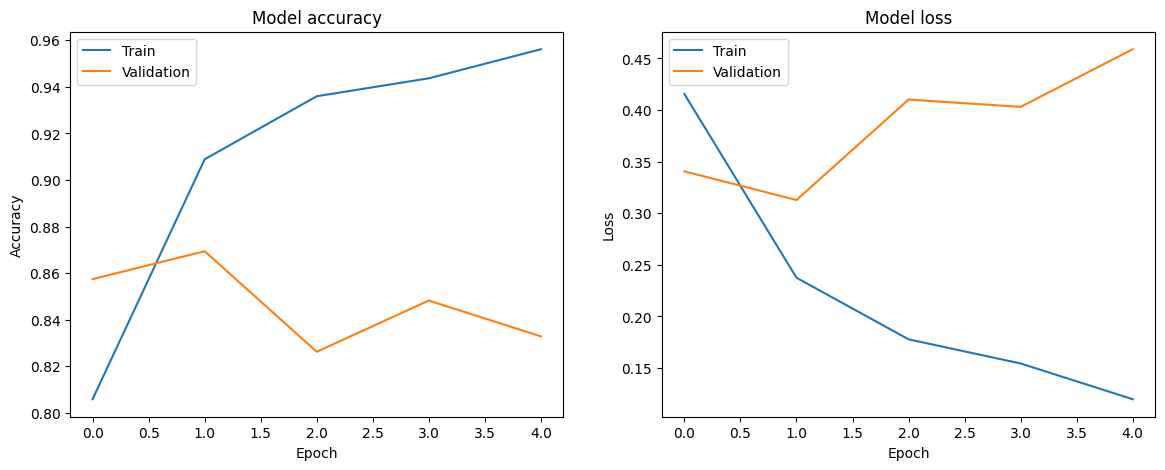

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [7]:
# Save the model
model.save('sentiment_analysis_lstm.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('sentiment_analysis_lstm.h5')

# Predict on new data
predictions = loaded_model.predict(X_test)
print(predictions[:5])


782/782 [==============================] - 187s 238ms/step
[[0.81720066]
 [0.99883056]
 [0.71739674]
 [0.9677738 ]
 [0.999636  ]]
